## PyCity_Calc tutorial (Part 2)

Now we are going to learn how to generate a city object within pycity_calc. 

The city object of pycity_calc is an inheritance of the city district object of pycity (which is an inheritance of uesgraph, which is an inheritance of networkx.Graph). Long list of dependencies...however, can be pretty powerful. 

Again, we have to start to define an environment

In [1]:
import pycity_base.classes.Weather as Weather

import pycity_calc.environments.co2emissions as co2
import pycity_calc.environments.environment as env
import pycity_calc.environments.market as mark
import pycity_calc.environments.timer as time


#  Input parameters
year = 2010  # Reference year
timestep = 3600  # Timestep in seconds
location = (51.529086, 6.944689)  # (latitude, longitute) of location
altitude = 55  # altitude of location in m

#  Generate extended timer object
timer = time.TimerExtended(timestep=timestep, year=year)

#  Generate weather object
weather = Weather.Weather(timer, useTRY=True, location=location,
                          altitude=altitude)

#  Generate market object
market = mark.Market()
#  Market is an inheritance of pycity prices object

#  Generate co2 emissions object (new in pycity_calc)
co2em = co2.Emissions(year=year)

#  Generate environment
environment = env.EnvironmentExtended(timer, weather, prices=market,
                                      location=location, co2em=co2em)

print('Kind of object:')
print(environment._kind)

Kind of object:
environment


Next, we are going to generate a city object (of pycity_calc)

In [2]:
import pycity_calc.cities.city as city

#  Generate city object
city_object = city.City(environment=environment)

print('Kind of object:')
print(city_object._kind)
#  city is an inheritance of city district. Thus, it holds the city district attribute _kind = 'citydistrict'

Kind of object:
citydistrict


Now we are going to generate three BuildingExtended objects for the city object (with single zones / one apartment per building!)

In [3]:
import sympy.geometry.point as point

import pycity_base.classes.demand.SpaceHeating as SpaceHeating
import pycity_base.classes.demand.ElectricalDemand as ElectricalDemand
import pycity_base.classes.demand.Apartment as Apartment
import pycity_calc.buildings.building as build_ex


#  Iterate 3 times to generate 3 building objects
for i in range(3):
    #  Create space heating demand object (with standardized load profiles (method=1))
    heat_demand = SpaceHeating.SpaceHeating(environment,
                                            method=1,
                                            profile_type='HEF',
                                            livingArea=100,
                                            specificDemand=130)

    #  Create electrical demand object (with standardized load profile)
    el_demand = ElectricalDemand.ElectricalDemand(environment, method=1,
                                                  annualDemand=3000,
                                                  profileType="H0")

    #  We can create occupancy profiles, dhw profiles etc., but we are going to skip it, here.
    
    #  Create apartment
    apartment = Apartment.Apartment(environment)

    #  Add demands to apartment
    apartment.addMultipleEntities([heat_demand, el_demand])

    #  Create extended building object
    extended_building = build_ex.BuildingExtended(environment,
                                                  build_year=1962,
                                                  mod_year=2003,
                                                  build_type=0)

    #  Add apartment to extended building
    extended_building.addEntity(entity=apartment)

    #  Generate positions (sympy Point object)
    position = point.Point(i*10, 0)
    
    #  Add extended buildings to city object
    city_object.add_extended_building(extended_building=extended_building,
                                      position=position)

print('Get number of buildings:')
print(city_object.get_nb_of_building_entities())

print('Get annual space heating demand of one building:')
print(extended_building.get_annual_space_heat_demand())

Get number of buildings:
3
Get annual space heating demand of one building:
13000.0


City holds further methods:

In [4]:
print('\nGet list of node ids with building objects:')
print(city_object.get_list_build_entity_node_ids())

print('\nGet power curves of all buildings')
print(city_object.get_power_curves())

print('\nGet total annual space heating demand of all buildings')
print(city_object.get_annual_space_heating_demand())

print('\nGet total annual electrical demand of all buildings')
print(city_object.get_annual_el_demand())

print('\nNode ids of original city district')
print(city_object.nodes(data=False))
print('\nWith data:')
print(city_object.nodes(data=True))


Get list of node ids with building objects:
[1001, 1002, 1003]

Get power curves of all buildings
(array([ 244.82052 ,  226.913643,  209.84616 , ...,  206.098767,
        239.055471,  268.429914]), array([ 5304.87276967,  5443.26075496,  5581.64874026, ...,  6646.54219399,
        4537.2514064 ,  3308.09634313]))

Get total annual space heating demand of all buildings
39000.0

Get total annual electrical demand of all buildings
9000.00000004

Node ids of original city district
[1001, 1002, 1003]

With data:
[(1001, {'entity': <pycity_calc.buildings.building.BuildingExtended object at 0x000000000A99DBA8>, 'name': 1001, 'is_supply_cooling': False, 'is_supply_heating': False, 'is_supply_electricity': False, 'is_supply_gas': False, 'position': Point(0, 0), 'node_type': 'building', 'is_supply_other': False}), (1002, {'entity': <pycity_calc.buildings.building.BuildingExtended object at 0x000000000A99BB38>, 'name': 1002, 'is_supply_cooling': False, 'is_supply_heating': False, 'is_supply_elec

Now we are going to add streets to our city object:

In [5]:
#  Add street network

#  Add str nodes
node_1 = city_object.add_street_node(position=point.Point(0, -1))
node_2 = city_object.add_street_node(position=point.Point(10, -1))
node_3 = city_object.add_street_node(position=point.Point(20, -1))

#  Add edges
city_object.add_edge(node_1, node_2, network_type='street')
city_object.add_edge(node_2, node_3, network_type='street')

print('Nodelist street:')
print(city_object.nodelist_street)

Nodelist street:
[1004, 1005, 1006]


pycity_calc hold plotting methods. We are going to plot our existing city now:

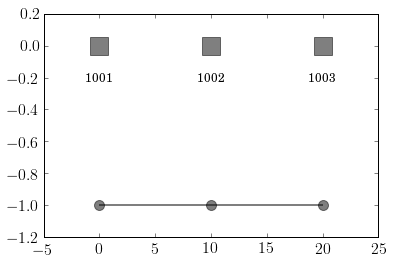

In [8]:
%matplotlib inline

import pycity_calc.visualization.city_visual as citvis

#  Plot city object
citvis.plot_city_district(city=city_object, offset=-0.2)

It is possible to generate a city district with txt/csv input table. Please take a look at pycity_calc/cities/scripts/...
Here you will find a city_generator (to generate city with buildings, only), a street_generator and a complex_city_generator (city with buildings and street network).

You should take a look at further examples within pycity_calc/examples folder to get more information. PyCity_Calc also holds a couple of toolbox-scripts for:
* City analysis
* Building clustering
* Energy system dimensioning
* Network operations
* Interface to TEASER

Energysystems, electrical grid (pypower) and simulations scripts are currently under development (06.04.2016). Going to be added, soon...